### Code untuk di Jupyter notebook

In [1]:
%cd C:\Users\Fadhlan\Pembelajaran Mesin\Dataset\preprocess melanoma\

C:\Users\Fadhlan\Pembelajaran Mesin\Dataset\preprocess melanoma


In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 5232-3FDD

 Directory of C:\Users\Fadhlan\Pembelajaran Mesin\Dataset\preprocess melanoma

08/11/2021  15:16    <DIR>          .
08/11/2021  15:16    <DIR>          ..
08/11/2021  15:16    <DIR>          testing
06/11/2021  14:12    <DIR>          training
06/11/2021  14:12    <DIR>          validation
               0 File(s)              0 bytes
               5 Dir(s)  26.879.717.376 bytes free


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=15,
                    horizontal_flip=True,
                    shear_range = 0.5,
                    brightness_range = [0.2,1.0],
                    zoom_range = 0.5,
                    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
                    rescale=1/255)

test_datagen = ImageDataGenerator(
                    rescale=1/255)

In [4]:
batch_size=32
train_dataset = train_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess melanoma/training/',
                                                 target_size=(224, 224),
                                                 class_mode='binary')

validation_dataset = val_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess melanoma/validation/',
                                                 target_size=(224, 224),
                                                 class_mode='binary')

test_dataset = test_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess melanoma/testing/',
                                                 target_size=(224, 224),
                                                 class_mode='binary')

Found 507 images belonging to 2 classes.
Found 145 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [6]:
model_1 = Sequential()

model_1.add(InputLayer(input_shape=[224,224,3]))
model_1.add(Conv2D(32, (3,3), strides=2, padding='same', activation='relu'))
model_1.add(MaxPool2D(2, 2, padding='same'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(64, (3,3), strides=2, padding='same', activation='relu'))
model_1.add(MaxPool2D(2, 2, padding='same'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(128, (3,3), strides=2, padding='same', activation='relu'))
model_1.add(MaxPool2D(2, 2, padding='same'))
model_1.add(Dropout(0.2))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [7]:
model_1.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])
callback = EarlyStopping(
    monitor="val_acc",
    patience=50,
    verbose=1,
    restore_best_weights=True,
)
train_step_size = train_dataset.n // train_dataset.batch_size
val_step_size = validation_dataset.n // validation_dataset.batch_size
history_model_1 = model_1.fit(train_dataset, epochs = 100, steps_per_epoch = train_step_size, validation_steps = val_step_size ,validation_data=validation_dataset, callbacks=[callback])

Epoch 1/100
15/15 [==============================] - 9s 391ms/step - loss: 0.7075 - acc: 0.4884 - val_loss: 0.6928 - val_acc: 0.4922
Epoch 2/100
15/15 [==============================] - 6s 378ms/step - loss: 0.6923 - acc: 0.5179 - val_loss: 0.6939 - val_acc: 0.5234
Epoch 3/100
15/15 [==============================] - 6s 379ms/step - loss: 0.6931 - acc: 0.5221 - val_loss: 0.6937 - val_acc: 0.5078
Epoch 4/100
15/15 [==============================] - 6s 378ms/step - loss: 0.6929 - acc: 0.5074 - val_loss: 0.6924 - val_acc: 0.5312
Epoch 5/100
15/15 [==============================] - 6s 366ms/step - loss: 0.6937 - acc: 0.5137 - val_loss: 0.6927 - val_acc: 0.5156
Epoch 6/100
15/15 [==============================] - 6s 370ms/step - loss: 0.6921 - acc: 0.5537 - val_loss: 0.6922 - val_acc: 0.5312
Epoch 7/100
15/15 [==============================] - 5s 364ms/step - loss: 0.6906 - acc: 0.5432 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 8/100
15/15 [==============================] - 6s 368ms/step - 

15/15 [==============================] - 6s 373ms/step - loss: 0.4396 - acc: 0.7958 - val_loss: 0.3633 - val_acc: 0.8203
Epoch 63/100
15/15 [==============================] - 6s 370ms/step - loss: 0.4355 - acc: 0.8105 - val_loss: 0.4021 - val_acc: 0.8203
Epoch 64/100
15/15 [==============================] - 6s 387ms/step - loss: 0.4200 - acc: 0.8063 - val_loss: 0.3572 - val_acc: 0.8594
Epoch 65/100
15/15 [==============================] - 6s 387ms/step - loss: 0.4568 - acc: 0.7832 - val_loss: 0.3940 - val_acc: 0.8047
Epoch 66/100
15/15 [==============================] - 6s 373ms/step - loss: 0.4599 - acc: 0.7642 - val_loss: 0.3905 - val_acc: 0.8516
Epoch 67/100
15/15 [==============================] - 6s 376ms/step - loss: 0.4407 - acc: 0.7937 - val_loss: 0.3569 - val_acc: 0.8516
Epoch 68/100
15/15 [==============================] - 6s 368ms/step - loss: 0.4110 - acc: 0.8189 - val_loss: 0.3632 - val_acc: 0.8594
Epoch 69/100
15/15 [==============================] - 6s 372ms/step - loss:

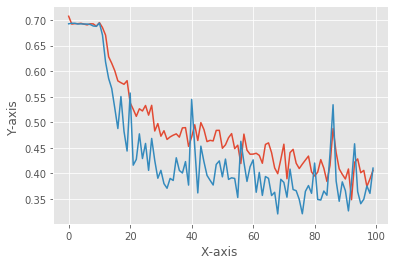

In [37]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
fig, ax = plt.subplots()
xpoints = np.arange(0, 100)
ypoints = history_model_1.history["loss"]
ypoints2 = history_model_1.history["val_loss"]
plt.plot(xpoints, ypoints, label="train_loss")
plt.plot(xpoints, ypoints2, label="val_loss")
plt.ylabel("Y-axis ")
plt.xlabel("X-axis ")

image_format = 'svg'
image_name = 'model-1-loss.svg'

fig.savefig(image_name, format=image_format, dpi=1200)

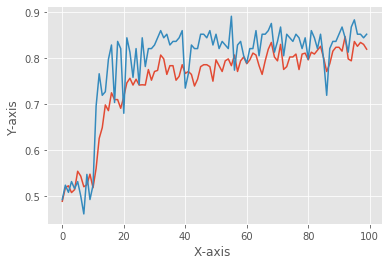

In [44]:
fig, ax = plt.subplots()
xpoints = np.arange(0, 100)
ypoints = history_model_1.history["acc"]
ypoints2 = history_model_1.history["val_acc"]
plt.plot(xpoints, ypoints, label="train_acc")
plt.plot(xpoints, ypoints2, label="val_acc")
plt.ylabel("Y-axis ")
plt.xlabel("X-axis ")

image_format = 'svg'
image_name = 'model-1-acc.svg'

fig.savefig(image_name, format=image_format, dpi=1200)

In [40]:
model_1.save('model_1.h5')

In [11]:
model_2 = Sequential()

model_2.add(InputLayer(input_shape=[224,224,3]))
model_2.add(Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=2, padding='same'))
model_2.add(Dropout(0.2))

model_2.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=2, padding='same'))
model_2.add(Dropout(0.2))

model_2.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=2, padding='same'))
model_2.add(Dropout(0.2))

model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 112, 112, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 16)         

In [12]:
model_2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])
callback = EarlyStopping(
    monitor="val_acc",
    patience=50,
    verbose=1,
    restore_best_weights=True,
)
train_step_size = train_dataset.n // train_dataset.batch_size
val_step_size = validation_dataset.n // validation_dataset.batch_size
history_model_2 = model_2.fit(train_dataset, epochs = 100, steps_per_epoch = train_step_size, validation_steps = val_step_size ,validation_data=validation_dataset, callbacks=[callback])

Epoch 1/100
15/15 [==============================] - 6s 369ms/step - loss: 0.6946 - acc: 0.5305 - val_loss: 0.6961 - val_acc: 0.4609
Epoch 2/100
15/15 [==============================] - 6s 370ms/step - loss: 0.6889 - acc: 0.5242 - val_loss: 0.6927 - val_acc: 0.5312
Epoch 3/100
15/15 [==============================] - 6s 404ms/step - loss: 0.6926 - acc: 0.5250 - val_loss: 0.6901 - val_acc: 0.5078
Epoch 4/100
15/15 [==============================] - 6s 406ms/step - loss: 0.6909 - acc: 0.5116 - val_loss: 0.6929 - val_acc: 0.5156
Epoch 5/100
15/15 [==============================] - 6s 378ms/step - loss: 0.7002 - acc: 0.4989 - val_loss: 0.6905 - val_acc: 0.5469
Epoch 6/100
15/15 [==============================] - 6s 381ms/step - loss: 0.6914 - acc: 0.5137 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 7/100
15/15 [==============================] - 6s 373ms/step - loss: 0.6909 - acc: 0.5263 - val_loss: 0.6871 - val_acc: 0.6094
Epoch 8/100
15/15 [==============================] - 6s 372ms/step - 

15/15 [==============================] - 6s 388ms/step - loss: 0.4307 - acc: 0.8021 - val_loss: 0.4406 - val_acc: 0.7891
Epoch 63/100
15/15 [==============================] - 6s 388ms/step - loss: 0.4474 - acc: 0.7726 - val_loss: 0.3788 - val_acc: 0.8438
Epoch 64/100
15/15 [==============================] - 6s 388ms/step - loss: 0.4731 - acc: 0.7705 - val_loss: 0.3993 - val_acc: 0.8516
Epoch 65/100
15/15 [==============================] - 6s 385ms/step - loss: 0.4487 - acc: 0.7979 - val_loss: 0.3956 - val_acc: 0.8594
Epoch 66/100
15/15 [==============================] - 6s 379ms/step - loss: 0.4628 - acc: 0.7832 - val_loss: 0.3775 - val_acc: 0.8203
Epoch 67/100
15/15 [==============================] - 6s 381ms/step - loss: 0.4830 - acc: 0.7621 - val_loss: 0.3686 - val_acc: 0.8438
Epoch 68/100
15/15 [==============================] - 6s 374ms/step - loss: 0.4449 - acc: 0.8105 - val_loss: 0.3860 - val_acc: 0.8672
Epoch 69/100
15/15 [==============================] - 6s 383ms/step - loss:

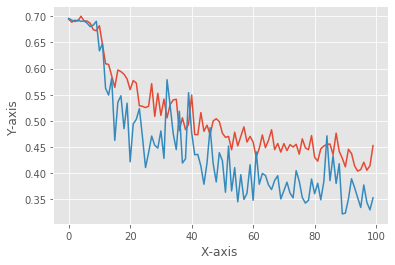

In [41]:
fig, ax = plt.subplots()
xpoints = np.arange(0, 100)
ypoints = history_model_2.history["loss"]
ypoints2 = history_model_2.history["val_loss"]
plt.plot(xpoints, ypoints, label="train_loss")
plt.plot(xpoints, ypoints2, label="val_loss")
plt.ylabel("Y-axis ")
plt.xlabel("X-axis ")

image_format = 'svg'
image_name = 'model-2-loss.svg'

fig.savefig(image_name, format=image_format, dpi=1200)

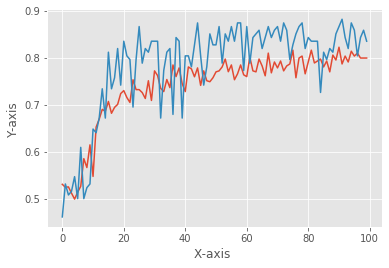

In [42]:
fig, ax = plt.subplots()
xpoints = np.arange(0, 100)
ypoints = history_model_2.history["acc"]
ypoints2 = history_model_2.history["val_acc"]
plt.plot(xpoints, ypoints, label="train_acc")
plt.plot(xpoints, ypoints2, label="val_acc")
plt.ylabel("Y-axis ")
plt.xlabel("X-axis ")

image_format = 'svg'
image_name = 'model-2-acc.svg'

fig.savefig(image_name, format=image_format, dpi=1200)

In [43]:
model_2.save('model_2.h5')